# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💼 🗝️</p>



<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>


* **[1.The purpose of the project 📜](#1)**

  - A simple definition of the idea of ​​the project
    
    
* **[2.Importing libraries 📚](#2)**  

   - Recall the most important libraries through which the project is completed 
    
 
* **[3.Exploratory data analysis (EDA) 📊](#3)**  

    - Knowledge of information through data and its representation in graphs

    - Know the parts that are not clear in the data in its normal form
      
    
* **[4.Data preprocessing 🔧](#4)**  
    
   - Data splitting 
    
   - Data generators 

    
* **[5.loading the model](#5)**  
    
    - Call backs
    
    - Training the model
    
    - plotting the model
    
    
* **[6.Model evaluation 📈](#6)**  
   
    - Classification report
    
    - Confusion matrix
    
    - ROC, Recall

    - Sensitivity, Specificity
    
    
 * **[7.Grad-Cam(HeatMap),Lime,SHAP](#7)**
    
    - Simply how cnn see
   
    

<a id="1"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">The purpose of the project 📜</p>

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>

🔘 **The problem** : Rice is vulnerable to various diseases during its growth, such as blast, sheath blight, white leaf blight, etc. These diseases not only affect the growth and yield of rice, but also may lead to the decline of rice quality and bring economic losses to farmers. Therefore, accurate and rapid classification and identification of rice leaf diseases is of great significance for preventing and controlling rice diseases and improving rice yield and quality.
    
    
🔘 **Solution** : The rice leaf disease classification project based on CNN model aims to build a CNN model including multiple convolution layers, pooling layers and fully connected layers by collecting a large amount of rice leaf disease image data, and realize automatic recognition and classification of rice leaf diseases by training and optimizing the model. The implementation of the project will help to improve the accuracy and efficiency of rice leaf disease identification, and provide technical support for the sustainable development of rice planting industry.

<a id="2"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing libraries 📚</p>

In [1]:
import os
import glob as gb
import numpy as np 
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

from sklearn.model_selection import train_test_split

2024-04-21 19:37:11.196078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 19:37:13.273240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<a id="3"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory data analysis (EDA) 📊 </p>




**<p style="color:#6D4318">Preparing all data paths</p>**


In [2]:
data_path=r'data'

**<p style="color:#6D4318">Find out the number of images in each folder</p>**

**<p style="color:#6D4318">Creat images data frame</p>**



In [3]:
# System libraries
from pathlib import Path
import os.path

image_dir = Path(data_path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
image_df.head(5)

,Filepath,Label
0,data/Healthy Rice Leaf/Healthy_rice_leaf (6).jpg,Healthy Rice Leaf
1,data/Healthy Rice Leaf/Healthy_rice_leaf (141)...,Healthy Rice Leaf
2,data/Healthy Rice Leaf/Healthy_rice_leaf (21).jpg,Healthy Rice Leaf
3,data/Healthy Rice Leaf/Healthy_rice_leaf (17).jpg,Healthy Rice Leaf
4,data/Healthy Rice Leaf/Healthy_rice_leaf (154)...,Healthy Rice Leaf


**<p style="color:#6D4318">Find out the distribution of each title in our data </p>**


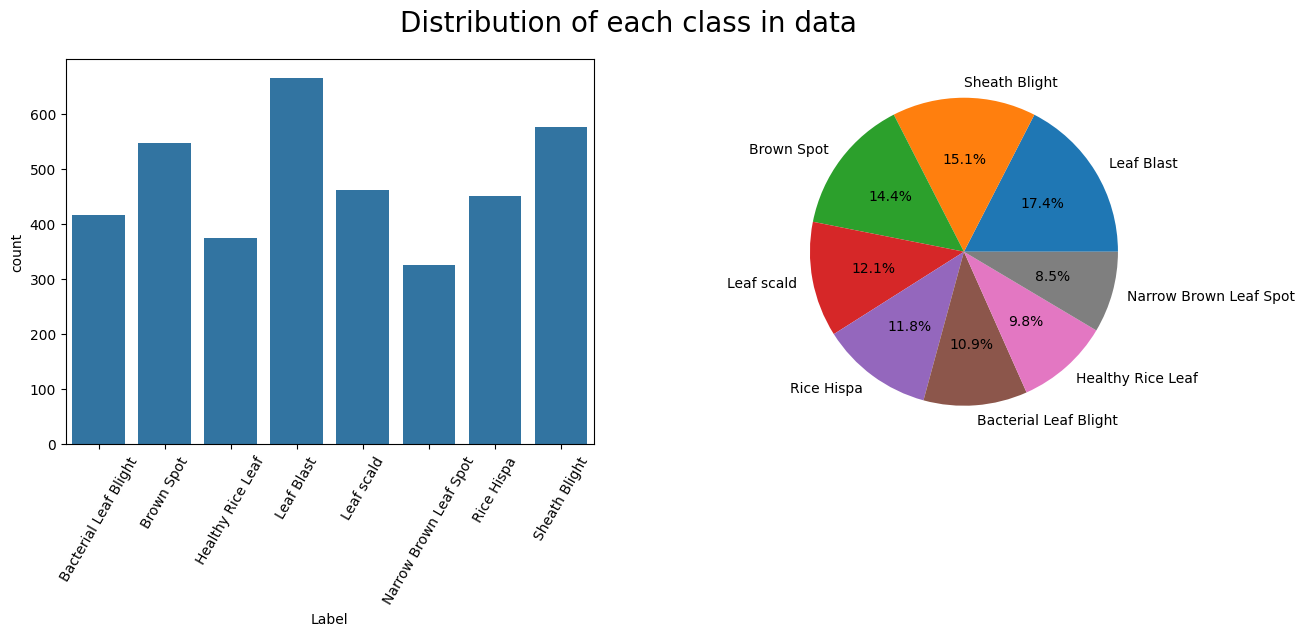

In [4]:
# plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=image_df,x='Label')
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.pie(x=image_df['Label'].value_counts().values,labels=image_df['Label'].value_counts().index,autopct='%1.1f%%')
plt.suptitle('Distribution of each class in data',size=20)
plt.show()

<span style=" font-family: Times New Roman ; font-size: 35px">
    Resize image </span>

In [6]:
import glob
import cv2

def resize_images(input_folder, output_folder, new_size):
    class_folders = glob.glob(os.path.join(input_folder, '*'))
    for class_folder in class_folders:
  
        image_files = glob.glob(os.path.join(class_folder, '*.*'))

        output_class_folder = os.path.join(output_folder, os.path.basename(class_folder))
        os.makedirs(output_class_folder, exist_ok=True)
        for img_path in image_files:
            try:
          
                image = cv2.imread(img_path)
        
                resized_image = cv2.resize(image, new_size)

                output_path = os.path.join(output_class_folder, os.path.basename(img_path))
   
                cv2.imwrite(output_path, resized_image)

            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

TRAIN_DIR  = "C:\\Users\\HP\\Desktop\\project\\Code\\Rice leaf disease_1\\Training data 1"
new_size = (250, 250)

resize_images(data_path, TRAIN_DIR, new_size)


<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>
    
**<p style="color:red">Observations 📋</p>**    
    
🔘 The data is balanced so that each class contains an equal number of images **(1000)** images

**<p style="color:#6D4318">Display 20 pictures of the dataset </p>**


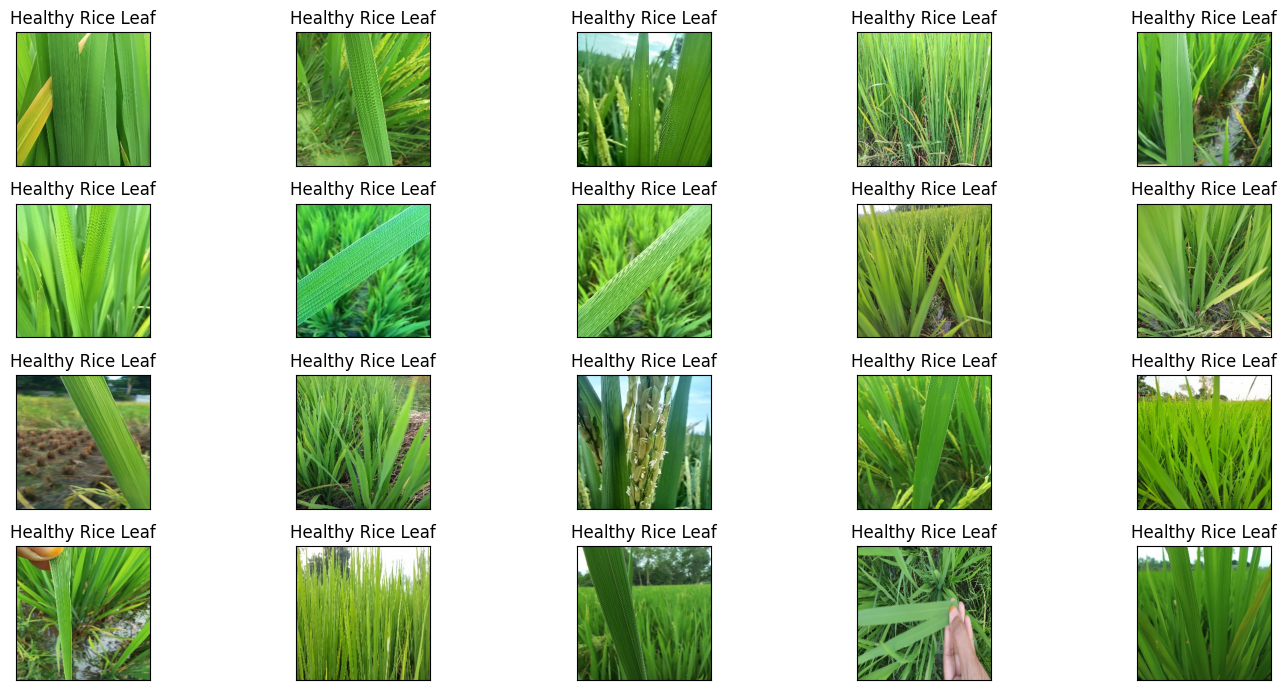

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data preprocessing 🔧 </p>

**<p style="color:#6D4318">Data splitting </p>**


In [4]:
training_df,testing_df=train_test_split(image_df,test_size=0.2,shuffle=True,random_state=1)

print('The dimension of training data :',training_df.shape)
print('The dimension of testing data :',testing_df.shape)

The dimension of training data : (1527, 2)
The dimension of testing data : (382, 2)


**<p style="color:#6D4318">Data generators </p>**


In [5]:
training_generator=ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True,validation_split=0.2)

testing_generator=ImageDataGenerator(rescale=1./255, rotation_range=40,shear_range=0.2, zoom_range=0.2,width_shift_range=0.2,horizontal_flip=True)
                                    

In [6]:
training_images=training_generator.flow_from_dataframe(

    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250, 250),    
    color_mode='rgb',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
    
)


validation_images=training_generator.flow_from_dataframe(


    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250,250),
    color_mode='rgb',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'

)


testing_images=testing_generator.flow_from_dataframe(


    dataframe=testing_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(250,250),
    color_mode='rgb',
    batch_size=16,
    shuffle=False,
)


Found 1222 validated image filenames belonging to 8 classes.
Found 305 validated image filenames belonging to 8 classes.
Found 382 validated image filenames belonging to 8 classes.


<a id="5"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">loading the model </p>




In [7]:
from keras.layers import Input, Conv2D, DepthwiseConv2D, Concatenate, Add, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D

def inception_module(x, filters):
    # Branch 1:1 x1 convolution
    branch_1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(x)

    # Branch 2: depth-separable convolution (3x3)
    branch_3x3 = DepthwiseConv2D(kernel_size=(3, 3), strides=1, padding='same', activation='relu')(x)
    branch_3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_3x3)

    # Branch 3: Depth-separable Convolution (5x5)
    branch_5x5 = DepthwiseConv2D(kernel_size=(5, 5), strides=1, padding='same', activation='relu')(x)
    branch_5x5 = Conv2D(filters=filters[2], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_5x5)

    # The branch 4:3x3 is maximized and then convolved with 1x1
    branch_pool = AveragePooling2D(pool_size=(3, 3), strides=1, padding='same')(x)
    branch_pool = Conv2D(filters=filters[3], kernel_size=(1, 1), strides=1, padding='same', activation='relu')(branch_pool)

    output = Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])
    return output

def residual_block(x, filters, dropout_rate):
    # Save the input for subsequent residual connections
    shortcut = x

    # The first Inception module
    x = inception_module(x, filters)
    x = Dropout(dropout_rate)(x)
    # The Second Inception module
    x = inception_module(x, filters)
    x = Dropout(dropout_rate)(x)
    # If the input and output dimensions do not match, the dimensions are adjusted using 1x1 convolution
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters=x.shape[-1], kernel_size=(1, 1), strides=1, padding='same')(shortcut)

    # Residual connection
    x = Add()([shortcut, x])
    x = tf.keras.layers.Activation('relu')(x)
    return x


dropout_rate = 0.2
# Input Layer
input_layer = Input(shape=(250, 250, 3))

# Convolution layer
conv1 = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(input_layer)

# Residual block
res_block1 = residual_block(conv1, [32, 64, 128, 32], dropout_rate)
res_block2 = residual_block(res_block1, [64, 64, 128, 32], dropout_rate)

pool2 = GlobalAveragePooling2D()(res_block2)
dense = Dense(2048, activation='relu')(pool2)
# Fully connected layer

output_layer = Dense(8, activation='softmax')(dense)

model = Model(inputs=input_layer, outputs=output_layer)

2024-04-21 19:37:43.297434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-21 19:37:43.443929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-21 19:37:43.444408: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**<p style="color:#6D4318">Call backs</p>**

<div style = 'border : 3px solid lightblue; background-color:#ABB9AB;padding:10px'>

🔘 **Early Stopping** is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set.
    
🔘 **ReduceLROnPlateau** reduce learning rate when a metric has stopped improving,... 
    This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
 
    
🔘 **ModelCheckpoint** Callback to save the Keras model or model weights at some frequency.



In [8]:
# early_stopping=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=0,factor=0.1)

model_check_point=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel_1.h5',save_best_only=True,verbose=True)

**<p style="color:#6D4318">Training the model </p>**


In [9]:
epochs=75
batch_size=16

nb_train_samples = training_images.samples
nb_validation_samples = validation_images.samples


In [10]:
import time
# Record the start time of training
start_time = time.time()

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(
    
    training_images,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_images,
    epochs=epochs,
    batch_size=batch_size,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[reduce_lr,model_check_point]

)

Epoch 1/75


2024-04-21 19:38:01.098436: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-21 19:38:04.730696: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-04-21 19:38:09.088743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-21 19:38:09.706228: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3440a1ccf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-21 19:38:09.706269: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-04-21 19:38:09.869107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:

76/76 [==============================] - ETA: 0s - loss: 2.0631 - accuracy: 0.1584
Epoch 1: val_accuracy improved from -inf to 0.13158, saving model to ./bestmodel_1.h5
76/76 [==============================] - 40s 275ms/step - loss: 2.0631 - accuracy: 0.1584 - val_loss: 2.0416 - val_accuracy: 0.1316 - lr: 0.0010
Epoch 2/75
76/76 [==============================] - ETA: 0s - loss: 1.9952 - accuracy: 0.2065
Epoch 2: val_accuracy improved from 0.13158 to 0.32566, saving model to ./bestmodel_1.h5
76/76 [==============================] - 20s 260ms/step - loss: 1.9952 - accuracy: 0.2065 - val_loss: 1.8636 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 3/75
76/76 [==============================] - ETA: 0s - loss: 1.7987 - accuracy: 0.2977
Epoch 3: val_accuracy improved from 0.32566 to 0.40461, saving model to ./bestmodel_1.h5
76/76 [==============================] - 20s 264ms/step - loss: 1.7987 - accuracy: 0.2977 - val_loss: 1.6192 - val_accuracy: 0.4046 - lr: 0.0010
Epoch 4/75
76/76 [============

In [12]:
# Record the training end time
end_time = time.time()

In [13]:
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 1959.3323090076447 seconds


**<p style="color:#6D4318">Model summary</p>**


In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 125, 125, 64)         4864      ['input_1[0][0]']             
                                                                                                  
 depthwise_conv2d (Depthwis  (None, 125, 125, 64)         640       ['conv2d[0][0]']              
 eConv2D)                                                                                         
                                                                                                  
 depthwise_conv2d_1 (Depthw  (None, 125, 125, 64)         1664      ['conv2d[0][0]']          

**<p style="color:#6D4318">plotting the model</p>**


In [18]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**<p style="color:#6D4318">model history data frame</p>**


In [15]:
history_df=pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,2.063108,0.158375,2.041555,0.131579,1.000000e-03
1,1.995206,0.206468,1.863613,0.325658,1.000000e-03
2,1.798682,0.297678,1.619224,0.404605,1.000000e-03
3,1.686487,0.322368,1.591987,0.381579,1.000000e-03
4,1.605200,0.379768,1.545338,0.368421,1.000000e-03
...,...,...,...,...,...
70,0.728455,0.748756,0.981993,0.657895,1.000000e-09
71,0.719083,0.746269,1.005903,0.644737,1.000000e-09
72,0.745055,0.728856,0.980260,0.651316,1.000000e-09
73,0.726138,0.748756,1.003697,0.671053,1.000000e-09


In [16]:
import joblib

joblib.dump(history.history,'history_bestDepthInceptionResNet_1.pkl')
history_CNN1 = joblib.load('history_bestDepthInceptionResNet_1.pkl')

In [17]:
def plot_performance(model_name, acc, val_acc, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.tight_layout()

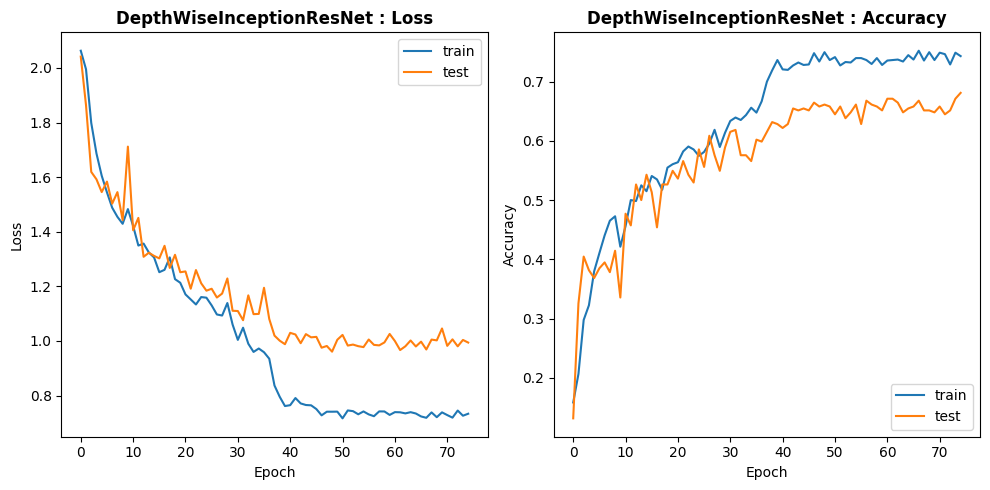

In [18]:
plot_performance(model_name='DepthWiseInceptionResNet',
                acc=history_CNN1['accuracy'], 
                 val_acc=history_CNN1['val_accuracy'],
                 loss=history_CNN1['loss'], 
                 val_loss=history_CNN1['val_loss'])

**<p style="color:#6D4318">Load the best validation accurecy model</p>**


In [19]:
from keras.models import load_model

model=load_model('bestmodel_1.h5')

**<p style="color:#6D4318">Evaluate the model on test data</p>**


In [20]:
Evaluation=model.evaluate(testing_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))


24/24 [==============================] - 5s 202ms/step - loss: 0.9194 - accuracy: 0.6806
Test Accuracy: 68.06%
Test Loss: 0.91943


In [21]:
val_loss = list()
val_accuracy = list()
test_loss= list()
test_accuracy = list()


score = model.evaluate(validation_images)
val_loss.append(score[0])
val_accuracy.append(score[1])
print('\nVal loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate(testing_images)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

test_loss.append(score[0])
test_accuracy.append(score[1])

20/20 [==============================] - 4s 182ms/step - loss: 1.0214 - accuracy: 0.6459

Val loss: 1.0213897228240967
Val accuracy: 0.645901620388031
24/24 [==============================] - 5s 210ms/step - loss: 0.9050 - accuracy: 0.6885

Test loss: 0.9049975275993347
Test accuracy: 0.6884816884994507


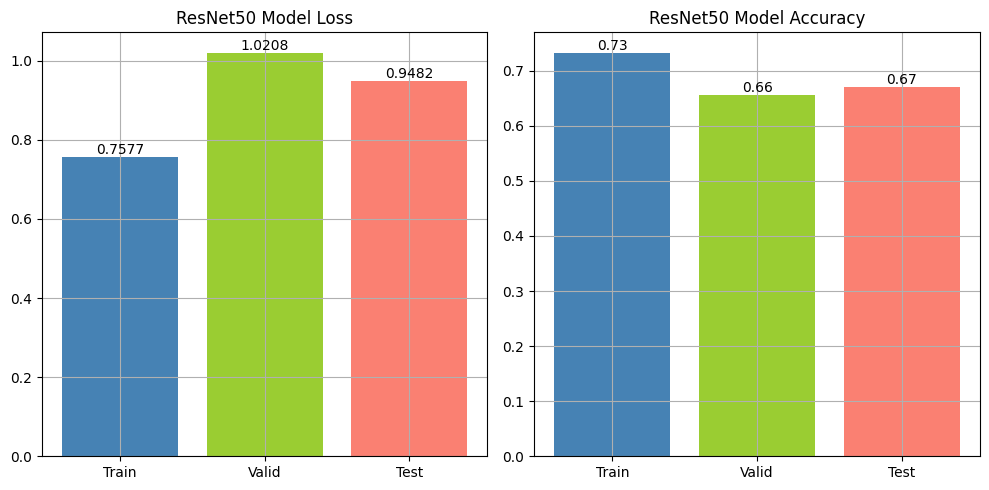

In [23]:
# Visualizing Model Performance
loss_values = [0.757691, 1.0208460092544556, 0.9481574892997742]  
accuracy_values = [0.733002, 0.6557376980781555, 0.6701570749282837] 

plt.figure(figsize=(10, 5))  
  
# 第一个子图：模型损失  
plt.subplot(1, 2, 1)  
plt.title("ResNet50 Model Loss")  
plt.bar(["Train", "Valid", "Test"], loss_values,color=['steelblue', 'yellowgreen', 'salmon'])  
  
# 为模型损失的每个条形添加数字标签  
for index, value in enumerate(loss_values):  
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')  
  
plt.grid()  
  
# 第二个子图：模型准确率  
plt.subplot(1, 2, 2)  
plt.title("ResNet50 Model Accuracy")  
plt.bar(["Train", "Valid", "Test"], accuracy_values,color=['steelblue', 'yellowgreen', 'salmon'])  
  
# 为模型准确率的每个条形添加数字标签  
for index, value in enumerate(accuracy_values):  
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')  
  
plt.grid()  
  
# 显示图表  
plt.tight_layout()  # 确保子图之间不会重叠  
plt.show()

**<p style="color:#6D4318">Model prediction</p>**


In [22]:
prediction=model.predict(testing_images)
prediction=np.argmax(prediction,axis=1)

24/24 [==============================] - 5s 186ms/step


In [23]:
training_images.class_indices

{'Bacterial Leaf Blight': 0,
 'Brown Spot': 1,
 'Healthy Rice Leaf': 2,
 'Leaf Blast': 3,
 'Leaf scald': 4,
 'Narrow Brown Leaf Spot': 5,
 'Rice Hispa': 6,
 'Sheath Blight': 7}

In [24]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

<a id="6"></a>
# <p style="padding:10px;background-color:#8DA48E ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model evaluation 📈 </p>



In [25]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

24/24 [==============================] - 5s 212ms/step
Classification Report
                        precision    recall  f1-score   support

 Bacterial Leaf Blight       0.57      0.72      0.63        36
            Brown Spot       0.54      0.65      0.59        52
     Healthy Rice Leaf       0.88      0.78      0.83        37
            Leaf Blast       0.66      0.76      0.71        70
            Leaf scald       0.55      0.65      0.60        43
Narrow Brown Leaf Spot       0.57      0.24      0.33        34
            Rice Hispa       0.89      0.87      0.88        47
         Sheath Blight       0.78      0.60      0.68        63

              accuracy                           0.67       382
             macro avg       0.68      0.66      0.66       382
          weighted avg       0.68      0.67      0.67       382



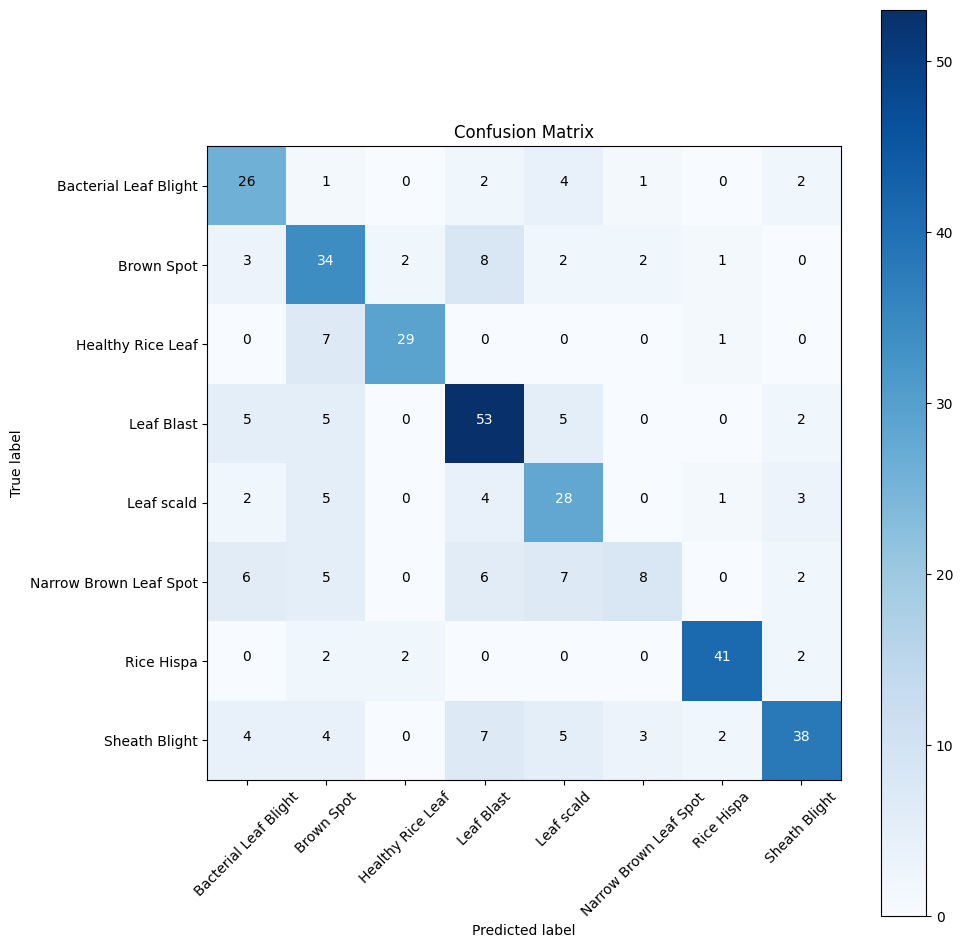

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict(testing_images)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
classes = list(training_images.class_indices.keys())
target_names = classes

#Confution Matrix
cm = confusion_matrix(testing_images.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(testing_images.classes, y_pred, target_names=target_names, zero_division=1))

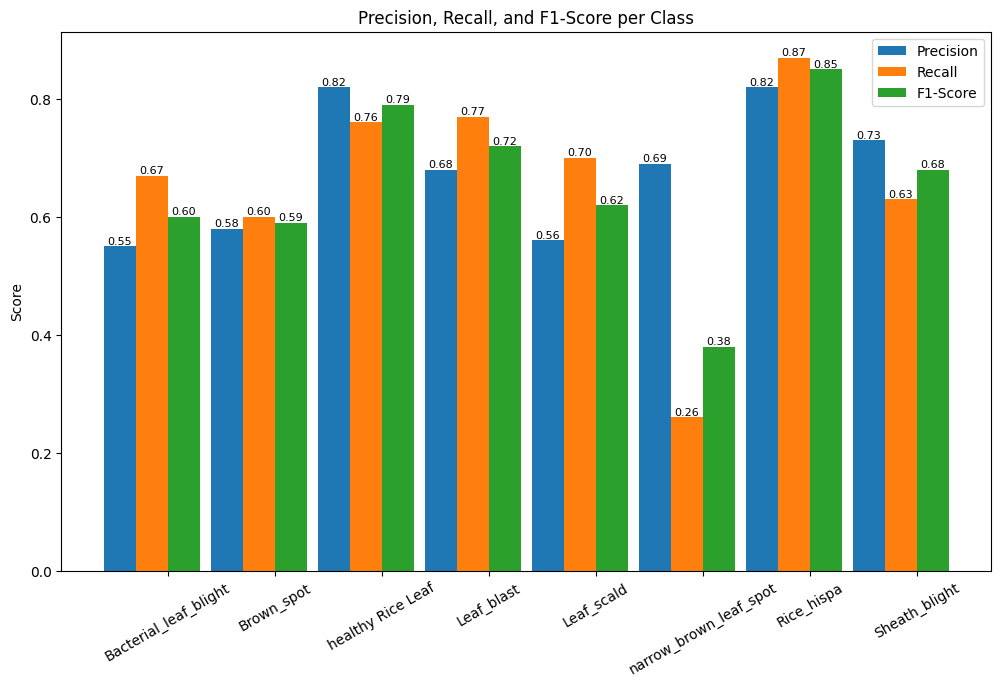

In [29]:
data = [['Bacterial_leaf_blight', 0.55, 0.67, 0.60],  
         ['Brown_spot', 0.58, 0.60, 0.59], 
         ['healthy Rice Leaf', 0.82, 0.76, 0.79], 
         ['Leaf_blast', 0.68, 0.77, 0.72],
         ['Leaf_scald', 0.56, 0.70, 0.62],
         ['narrow_brown_leaf_spot', 0.69, 0.26, 0.38],
         ['Rice_hispa', 0.82, 0.87, 0.85],
         ['Sheath_blight', 0.73, 0.63, 0.68]]  
  
# 创建DataFrame  
df = pd.DataFrame(data, columns=['Classes', 'precision', 'recall', 'f1-score'])  
  
# 设置图形的宽度和位置  
N = len(df)  
ind = range(N)  
width = 0.3  # 条形图的宽度  
fig, ax = plt.subplots(figsize=(12, 7))
  
# 绘制precision的条形图  
precision_bars = plt.bar(ind, df['precision'], width, label='Precision')  
  
# 绘制recall的条形图，位置稍微偏移一点以便区分  
recall_bars = plt.bar([i + width for i in ind], df['recall'], width, label='Recall')  
  
# 绘制f1-score的条形图，再偏移一点  
f1_bars=plt.bar([i + width*2 for i in ind], df['f1-score'], width, label='F1-Score')  
  
# 添加类名到x轴  
plt.xticks([i + width*1.5 for i in ind], df['Classes'], rotation=30)  
  
# 设置y轴的标签  
plt.ylabel('Score')  
  
# 添加标题  
plt.title('Precision, Recall, and F1-Score per Class')  
  
# 添加图例  
plt.legend()  

# 为每个条形添加数字标签  
def add_value_labels(bars, fontsize=8):  
    for bar in bars:  
        height = bar.get_height()  
        plt.text(bar.get_x() + bar.get_width()/2, height,  
                 '{:.2f}'.format(height),  
                 ha='center', va='bottom', fontsize=fontsize)  
  
add_value_labels(precision_bars)  
add_value_labels(recall_bars)  
add_value_labels(f1_bars)  
  
# 显示图形  
plt.show()

24/24 [==============================] - 5s 185ms/step


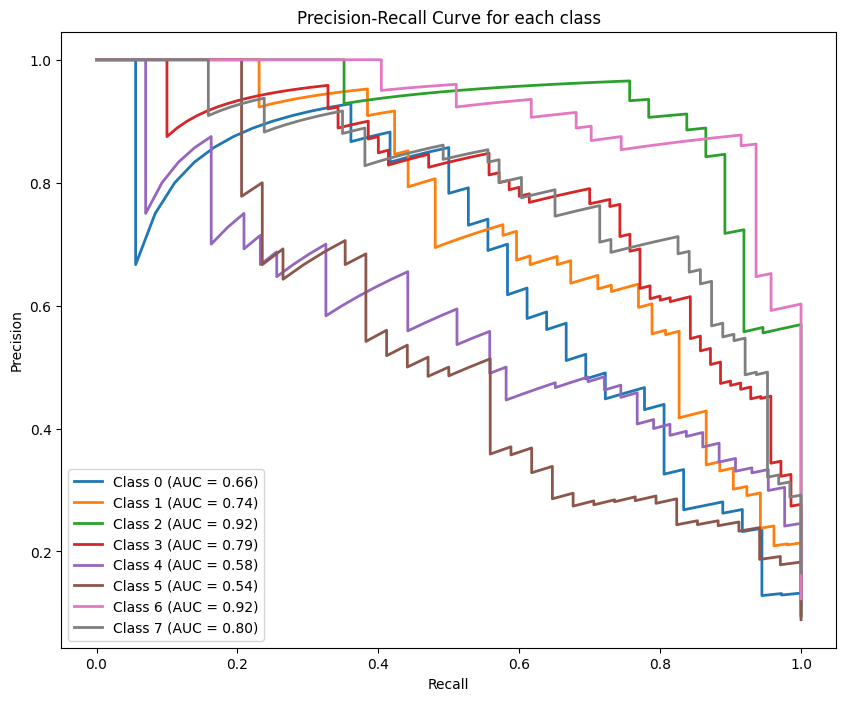

In [27]:
# Precision-Recall Curve for each class
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


classes = list(training_images.class_indices.keys())
Y_pred= model.predict(testing_images)
n_classes = len(classes)
y_true_bin = label_binarize(testing_images.classes, classes=list(range(n_classes)))
precision = dict()
recall = dict()
auc_score = dict()

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], Y_pred[:, i])
    auc_score[i] = auc(recall[i], precision[i])
    
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="best")
plt.show()

In [28]:
#Generate predictions for the test dataset
y_pred_labels = (Y_pred>0.5).astype(int)

#Get the true labels from thee test generator
y_true = testing_images.classes

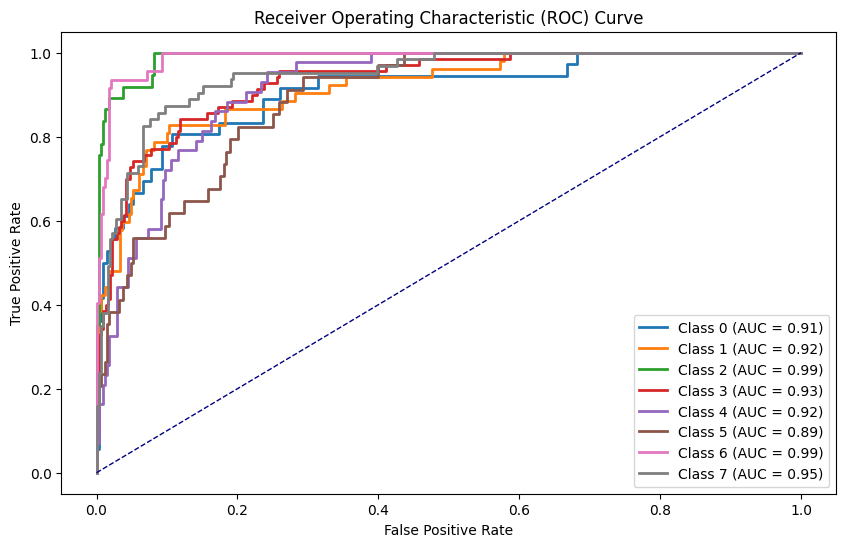

In [29]:
# Compute ROC curve
from sklearn.metrics import roc_curve, auc

#Get the true labels from thee test generator
# y_true = test_generator.classes
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Initialize arrays to store fpr, tpr, and auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Initialize the list of Sensitivity and Specificity for each class
sensitivity_list = []
specificity_list = []

# The Sensitivity and Specificity of each class were calculated
for i in range(len(cm)):
    tp = cm[i, i]  # True Positive
    fn = np.sum(cm[i, :]) - tp  # False Negative
    fp = np.sum(cm[:, i]) - tp  # False Positive
    tn = np.sum(cm) - (tp + fn + fp)  # True Negative
    
    sensitivity = tp / (tp + fn + 1e-10)  # Add a small number to avoid dividing by zero
    specificity = tn / (tn + fp + 1e-10)
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Output Sensitivity and Specificity for each category
for idx, (sen, spec) in enumerate(zip(sensitivity_list, specificity_list)):
    print(f"Class {idx} - Sensitivity: {sen}, Specificity: {spec}")

Class 0 - Sensitivity: 0.722222222220216, Specificity: 0.9421965317916352
Class 1 - Sensitivity: 0.6538461538448964, Specificity: 0.9121212121209358
Class 2 - Sensitivity: 0.7837837837816655, Specificity: 0.9884057971011628
Class 3 - Sensitivity: 0.7571428571417755, Specificity: 0.9134615384612457
Class 4 - Sensitivity: 0.65116279069616, Specificity: 0.9321533923301085
Class 5 - Sensitivity: 0.23529411764636676, Specificity: 0.9827586206893728
Class 6 - Sensitivity: 0.8723404255300589, Specificity: 0.9850746268653776
Class 7 - Sensitivity: 0.6031746031736457, Specificity: 0.9655172413790077


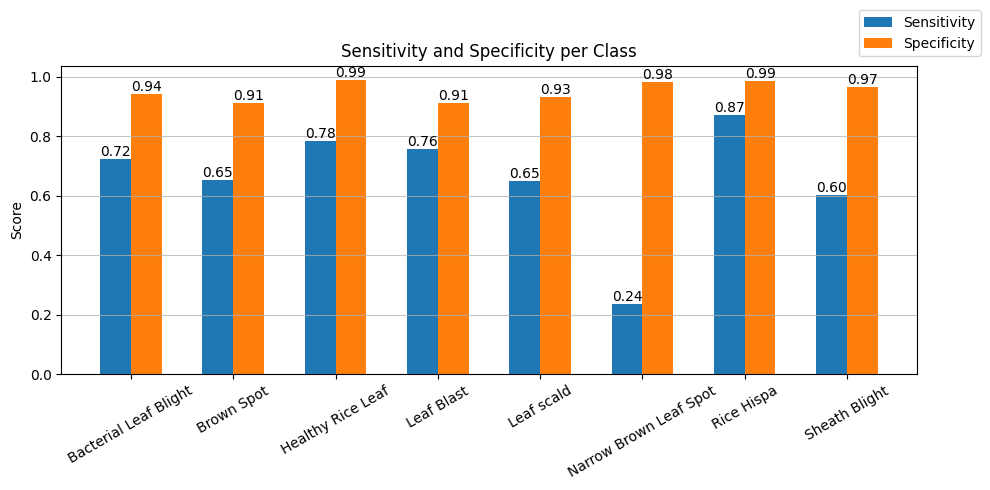

In [31]:
# 设置图形的宽度和位置  
N = len(sensitivity_list)  
ind = np.arange(N)  
width = 0.3  # 每个条形图的宽度  
  
# 绘制灵敏度的条形图  
plt.figure(figsize=(10, 5))  
sensitivity_bars = plt.bar(ind, sensitivity_list, width, label='Sensitivity')  
  
# 绘制特异度的条形图（注意：位置需要偏移以避免重叠）  
specificity_bars = plt.bar(ind + width, specificity_list, width, label='Specificity')  
   
plt.xticks(ind + width / 2, classes, rotation=30)  
  
# 设置x轴的标签为类别索引（如果没有具体的类标签列表）  
# plt.xticks(ind + width / 2, range(1, N + 1))  
  
# 设置y轴的标签  
plt.ylabel('Score')  
  
# 添加标题  
plt.title('Sensitivity and Specificity per Class')  


# 添加图例到图形的外部位置  
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 1), borderaxespad=-4)  
  
# 显示网格线  
plt.grid(axis='y', alpha=0.75)  
  
# 调整x轴和y轴的边距，以确保条形图完全可见  
plt.tight_layout()  
  
# 为每个条形添加数字标签  
def add_value_labels(bars, values):  
    for bar, value in zip(bars, values):  
        height = bar.get_height()  
        plt.text(bar.get_x() + bar.get_width() / 2, height,  
                 '{:.2f}'.format(value),  
                 ha='center', va='bottom')  
  
add_value_labels(sensitivity_bars, sensitivity_list)  
add_value_labels(specificity_bars, specificity_list)  
  
# 显示图形  
plt.show()

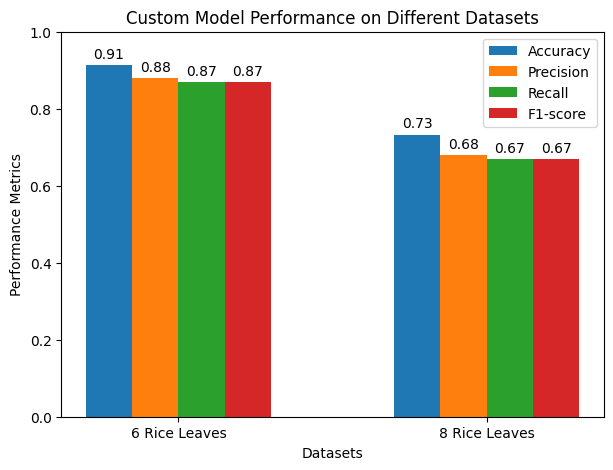

In [18]:
import matplotlib.pyplot as plt  
  
import seaborn as sns  
  
# 提供的性能指标  
accuracies = [0.912365, 0.733002]  
precisions = [0.88, 0.68]  
recalls = [0.87, 0.67]  
f1_scores = [0.87, 0.67]  
  
# 数据集标签  
datasets = ['6 Rice Leaves', '8 Rice Leaves']  
  
# 创建一个新的图形  
plt.figure(figsize=(7, 5))  
  
# 设置条形图的宽度和位置  
bar_width = 0.15  
index = np.arange(len(datasets))  
  
# 绘制Accuracy的条形图  
plt.bar(index, accuracies, bar_width, label='Accuracy', color=sns.color_palette()[0])  
  
# 绘制Precision的条形图  
plt.bar(index + bar_width, precisions, bar_width, label='Precision', color=sns.color_palette()[1])  
  
# 绘制Recall的条形图  
plt.bar(index + 2*bar_width, recalls, bar_width, label='Recall', color=sns.color_palette()[2])  
  
# 绘制f1-score的条形图  
plt.bar(index + 3*bar_width, f1_scores, bar_width, label='F1-score', color=sns.color_palette()[3])  
  
# 设置x轴标签位置  
plt.xticks([i + 1.5 * bar_width for i in index], datasets)  


# 为Accuracy条形图添加数字标签  
for i, v in enumerate(accuracies):  
    plt.text(i, v + 0.01, '{:.2f}'.format(v), ha='center', va='bottom')  
  
# 为Precision条形图添加数字标签  
for i, v in enumerate(precisions):  
    plt.text(i + bar_width, v + 0.01, '{:.2f}'.format(v), ha='center', va='bottom')  
  
# 为Recall条形图添加数字标签  
for i, v in enumerate(recalls):  
    plt.text(i + 2*bar_width, v + 0.01, '{:.2f}'.format(v), ha='center', va='bottom')  
  
# 为f1-score条形图添加数字标签  
for i, v in enumerate(f1_scores):  
    plt.text(i + 3*bar_width, v + 0.01, '{:.2f}'.format(v), ha='center', va='bottom')  

  
# 添加图例  
plt.legend()  
  
# 设置x轴的标签  
plt.xlabel('Datasets')  
  
# 设置y轴的标签  
plt.ylabel('Performance Metrics')  
  
# 设置y轴的刻度范围  
plt.ylim(0, 1)  
  
# 添加标题  
plt.title('Custom Model Performance on Different Datasets')  

  
# 显示图形  
plt.show()

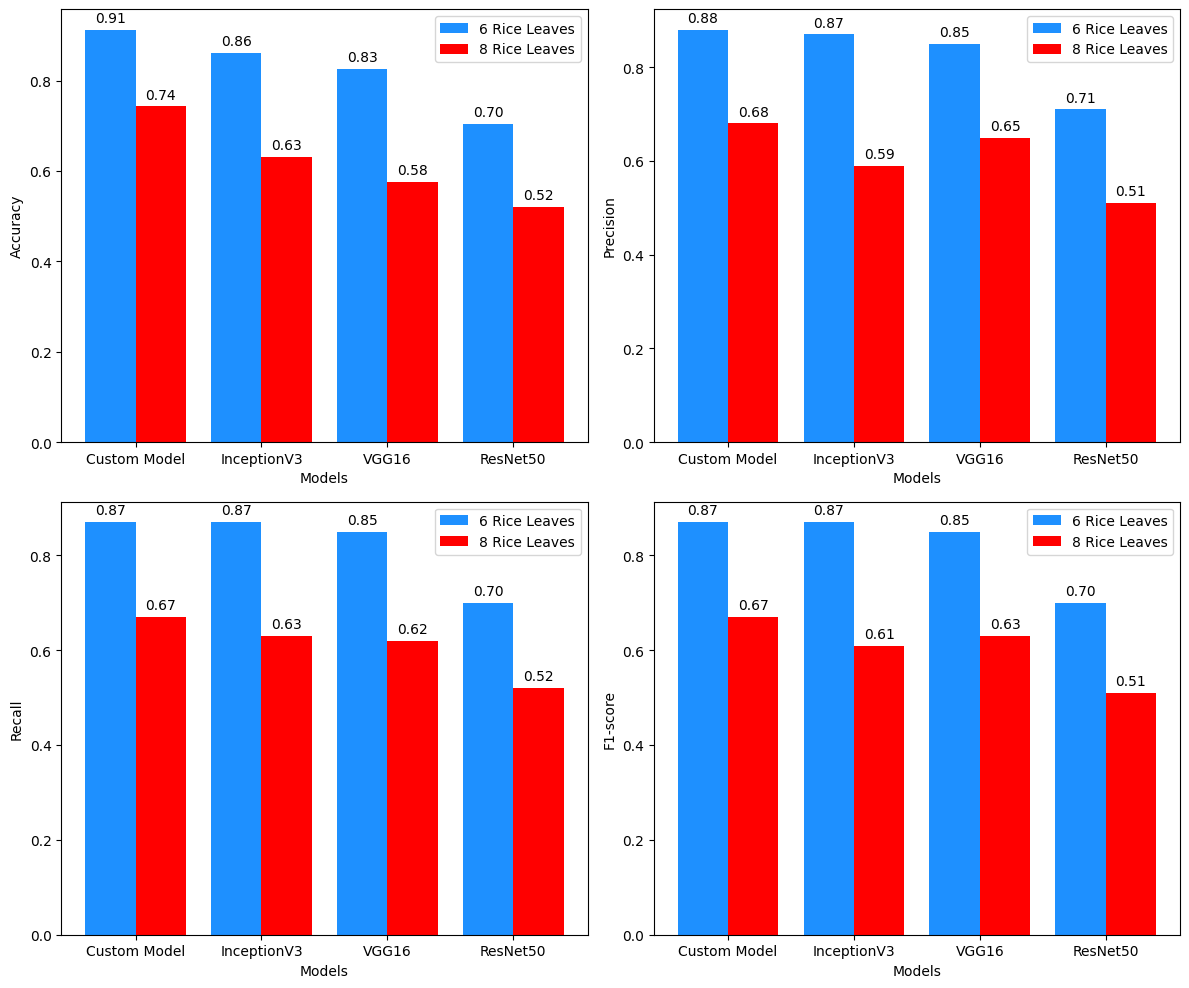

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['Custom Model', 'InceptionV3', 'VGG16', 'ResNet50']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# 不同模型在两个数据集上的性能值
custom_model_values = {
    'Accuracy': [0.912365, 0.742952],
    'Precision': [0.88, 0.68],
    'Recall': [0.87, 0.67],
    'F1-score': [0.87, 0.67]
}

inception_v3_values = {
    'Accuracy': [0.860714, 0.631384],
    'Precision': [0.87, 0.59],
    'Recall': [0.87, 0.63],
    'F1-score': [0.87, 0.61]
}

vgg16_values = {
    'Accuracy': [0.825850, 0.5759],
    'Precision': [0.85, 0.65],
    'Recall': [0.85, 0.62],
    'F1-score': [0.85, 0.63]
}

resnet50_values = {
    'Accuracy': [0.704762, 0.52],
    'Precision': [0.71, 0.51],
    'Recall': [0.70, 0.52],
    'F1-score': [0.70, 0.51]
}

# 绘制图表
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    
    # 提取每个模型在两个数据集上的性能值
    custom_data = custom_model_values[metric]
    inception_v3_data = inception_v3_values[metric]
    vgg16_data = vgg16_values[metric]
    resnet50_data = resnet50_values[metric]
    
    # 绘制柱状图
    bar_width = 0.4
    index = np.arange(len(models))
    ax.bar(index - bar_width / 2, [custom_data[0], inception_v3_data[0], vgg16_data[0], resnet50_data[0]], bar_width, label='6 Rice Leaves', color='dodgerblue')
    ax.bar(index + bar_width / 2, [custom_data[1], inception_v3_data[1], vgg16_data[1], resnet50_data[1]], bar_width, label='8 Rice Leaves', color='red')
    
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticks(index)
    ax.set_xticklabels(models)
    ax.legend()

    # 添加数字标签
    for j, value in enumerate([custom_data, inception_v3_data, vgg16_data, resnet50_data]):
        for k, val in enumerate(value):
            ax.text(j + (k - 0.5) * bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
